In [148]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

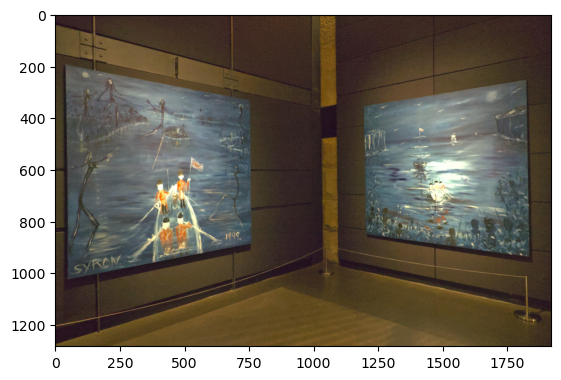

In [149]:
image = cv2.imread("SwapTwoFrame.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image) 
plt.show() 

In [150]:
#Find the homography matrix for image 1 and image 2
pts = [[40,192], [47,1022], [756,882], [754,333], [431,491]]
pts_ = [[1195,353],[1202,852],[1829,934],[1824,258],[1463,611]]
H1,_ = cv2.findHomography(np.array(pts), np.array(pts_), cv2.RANSAC, 3.0)
H2,_ = cv2.findHomography(np.array(pts_),np.array(pts),cv2.RANSAC,3.0)


In [ ]:
h,w=image.shape[:2]
result1 = cv2.warpPerspective(image, H1, (w, h))
result2 = cv2.warpPerspective(image,H2,(w,h))
#ignore below just used for showing 
result1_c = result1.copy()
result2_c = result2.copy()

In [152]:
#create the masks
pts = [[40,192], [47,1022], [756,882], [754,333]]
pts_ = [[1195,353],[1202,852],[1829,934],[1824,258]]
mask1= np.zeros((h,w),dtype=np.uint8)
mask1 = cv2.fillPoly(mask1,[np.array(pts_)],255)#put the corners of the points(R) we use 255 because 2^8-1 = 255 and then use the negative 
mask2= np.zeros((h,w),dtype=np.uint8)
mask2 = cv2.fillPoly(mask1,[np.array(pts)],255)#Left


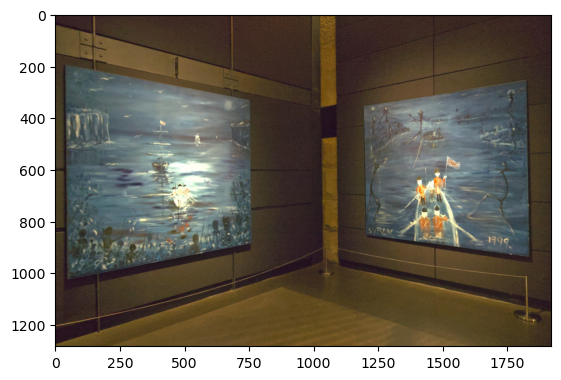

In [153]:
#apply mask to extract the image
result1= cv2.bitwise_and(result1,result1,mask=mask1) #use the mask to extract only the painting values
result2= cv2.bitwise_and(result2,result2,mask=mask2)

#apply the mask to extract the original image
without_paints = cv2.bitwise_and(image,image,mask=cv2.bitwise_not(mask1))#use the negative of 255 so 0 to apply outside the painting
without_paints = cv2.bitwise_and(without_paints,without_paints,mask=cv2.bitwise_not(mask1))

#merge two images
merged = cv2.add(without_paints,result1)
merged = cv2.add(merged,result2)
plt.imshow(merged)
plt.show()

In [154]:
#store the image
cv2.imwrite("swapped_image.jpg", cv2.cvtColor(merged, cv2.COLOR_RGB2BGR))

True

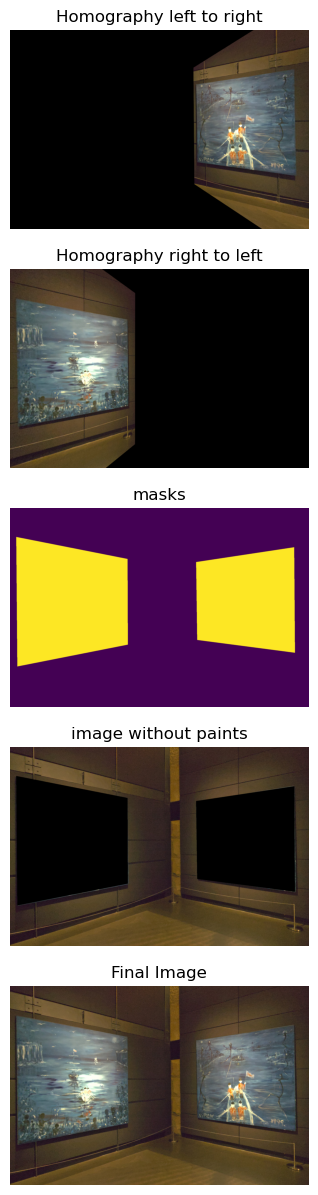

In [155]:
fig = plt.figure(figsize=(6, 15))
fig.add_subplot(511)
plt.title("Homography left to right")
plt.axis('off') 
plt.imshow(result1_c)    

fig.add_subplot(512)
plt.title("Homography right to left")
plt.axis('off') 
plt.imshow(result2_c)   



fig.add_subplot(513)
plt.title("masks")
plt.axis('off') 
plt.imshow(mask2)                                                                                                                                                                                                                                                      
plt.imshow(mask1)

fig.add_subplot(514)
plt.title("image without paints")
plt.axis('off')
plt.imshow(without_paints)

fig.add_subplot(515)
plt.title("Final Image")
plt.axis('off') 
plt.imshow(merged)



